In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from LDAfomer import *
from data_train_test import *

In [8]:
def demo(dataset, fold, device):
    tt_set = prep_dataloader(dataset=dataset, fold=fold, mode='test', dimension=3, batch_size=32)

    model = torch.load('models/demo_' + dataset + '_fold' + str(fold) + '.pth')
    labels, preds = test(tt_set, model, device)

    fpr, tpr, _ =  roc_curve(labels, preds)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='LDAformer (AUC={:.3f})'.format(auc(fpr, tpr)))
    plt.legend()
    plt.show()

    precision, recall, _ = precision_recall_curve(labels, preds)
    plt.title('PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot(recall, precision, label='LDAformer (AUPR={:.3f})'.format(auc(recall, precision)))
    plt.legend()
    plt.show()


Finished reading the test set of Dataset (94566 samples found, each dim = torch.Size([1147, 6]))


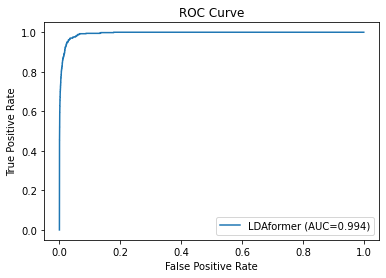

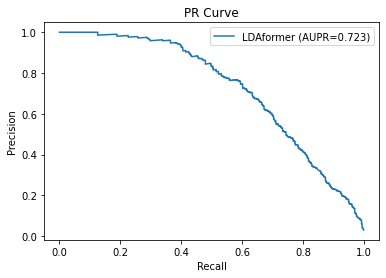

In [9]:
dataset = 'dataset1'
fold = 0
gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
demo(dataset, fold, gpu)